In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

This is an exploratory, experimental, notebook. Please treat the code in as such.

In [2]:
# chars_df = pd.read_pickle('file_name.pickle')
# chars_df.head()

In [3]:
# chars_df['char_gender'].value_counts()

In [4]:
# f_chars = chars_df.loc[chars_df['char_gender'] == 'she/her']
# print(f_chars.shape)

# m_chars = chars_df.loc[chars_df['char_gender'] == 'he/him/his']
# print(m_chars.shape)

# nb = ['they/them/their','ze/zem/zir/hir']
# nb_chars = chars_df[chars_df.char_gender.isin(nb)]
# print(nb_chars.shape)

### Exploratory anaysis with one book
#### The Left Hand of Darkness
The next few cells are focused on one book: _The Left Hand of Darkness_ by Ursula K. LeGuin. This is a famous example of a book with characters who can change sex as an adult. In this book, however, she refers to the main character with male pronouns. We want to step through a bit of basic verification to see what this looks like. The three characters we are pulling are Genly, an exclusively male character, Estraven, an alien who can change sex but uses male pronouns in the book, and King Argaven, a "male" alien who carries a pregnancy.

In [5]:
# to-do move this into function in python files
# read in json, normalize data
# to-do: only keep column names we want to load (i.e. drop the NLP colummns)
t = open('data/dan_booknlp/mdp.39015052467530/mdp.39015052467530.book')
temp_json = json.load(t)
lhd_book = pd.concat([pd.DataFrame(temp_json), 
                pd.json_normalize(temp_json['characters'])], 
                axis=1)

#drop characters column
lhd_book = lhd_book.drop('characters', axis=1)
# lhd_book.set_index('id' , inplace=True)
lhd_book.head()

,agent,patient,mod,poss,id,count,g.inference.he/him/his,g.inference.she/her,g.inference.they/them/their,g.inference.xe/xem/xyr/xir,g.inference.ze/zem/zir/hir,g.argmax,g.max,g.total,mentions.proper,mentions.common,mentions.pronoun,g
0,"[{'w': 'told', 'i': 337}, {'w': 'told', 'i': 4...","[{'w': 'taught', 'i': 344}, {'w': 'lost', 'i':...","[{'w': 'ona', 'i': 442}, {'w': 'sure', 'i': 44...","[{'w': 'report', 'i': 333}, {'w': 'homeworld',...",0,2784,0.805,0.010,0.154,0.012,0.019,he/him/his,0.805,391.766,[],[],"[{'c': 1512, 'n': 'I'}, {'c': 419, 'n': 'me'},...",NaN
1,"[{'w': 'explained', 'i': 3066}, {'w': 'stood',...","[{'w': 'forcing', 'i': 4333}, {'w': 'follow', ...","[{'w': 'obliging', 'i': 3078}, {'w': 'famous',...","[{'w': 'kindness', 'i': 3120}, {'w': 'house', ...",385,731,0.805,0.112,0.083,0.000,0.000,he/him/his,0.805,1100073.796,"[{'c': 192, 'n': 'Estraven'}, {'c': 11, 'n': '...",[],"[{'c': 157, 'n': 'he'}, {'c': 91, 'n': 'his'},...",NaN
2,"[{'w': 'want', 'i': 13840}, {'w': 'have', 'i':...","[{'w': 'have', 'i': 2738}, {'w': 'believe', 'i...","[{'w': 'insane', 'i': 6215}, {'w': 'refugee', ...","[{'w': 'box', 'i': 13818}, {'w': 'machine', 'i...",384,231,0.811,0.113,0.077,0.000,0.000,he/him/his,0.811,4600011.839,"[{'c': 46, 'n': 'Mr. Ai'}, {'c': 6, 'n': 'the ...",[],"[{'c': 38, 'n': 'you'}, {'c': 34, 'n': 'I'}, {...",NaN
3,"[{'w': 'knows', 'i': 6268}, {'w': 'believes', ...","[{'w': 'tell', 'i': 6240}, {'w': 'told', 'i': ...","[{'w': 'king', 'i': 6318}, {'w': 'member', 'i'...","[{'w': 'power', 'i': 6344}, {'w': 'kingdom', '...",397,194,0.856,0.042,0.102,0.000,0.000,he/him/his,0.856,600017.951,"[{'c': 28, 'n': 'Argaven'}, {'c': 25, 'n': 'Ka...",[],"[{'c': 25, 'n': 'his'}, {'c': 24, 'n': 'he'}, ...",NaN
4,"[{'w': 'ascends', 'i': 1424}, {'w': 'mounts', ...","[{'w': 'awaits', 'i': 1574}, {'w': 'Trust', 'i...","[{'w': 'patriot', 'i': 6805}, {'w': 'sure', 'i...","[{'w': 'presence', 'i': 914}, {'w': 'Hearths',...",605,179,1.000,0.000,0.000,0.000,0.000,he/him/his,1.000,44.000,[],"[{'c': 58, 'n': 'the king'}, {'c': 13, 'n': 'T...","[{'c': 25, 'n': 'I'}, {'c': 16, 'n': 'his'}, {...",NaN


In [6]:
lhd_entit = pd.read_csv('data/dan_booknlp/mdp.39015052467530/mdp.39015052467530.entities', sep='\t')
lhd_entit.drop(['start_token', 'end_token'], axis=1, inplace=True)  # drop because it complicates what counts as a unique row

In [7]:
lhd_entit.head()

,COREF,prop,cat,text
0,584,NOM,FAC,NIVERS THE UN CHIGAN • LIBRE BRARIES THE LEFT ...
1,1,PROP,FAC,URSULA K. LEGUIN WALKER AND COMPANY New York UGL
2,374,PROP,PER,Ursula
3,2,PROP,GPE,LeGuin
4,585,NOM,PER,the Publisher


In [8]:
lhd_entit['text']

0        NIVERS THE UN CHIGAN • LIBRE BRARIES THE LEFT ...
1         URSULA K. LEGUIN WALKER AND COMPANY New York UGL
2                                                   Ursula
3                                                   LeGuin
4                                            the Publisher
                               ...                        
15023                                          Onnetherhad
15024                                               Odyrny
15025                                          Ottormenbod
15026                                                   my
15027                                             MICHIGAN
Name: text, Length: 15028, dtype: object

### Get Character References for each character
For each of the three named characters we cared about, we need to make sure we capture all the different references associated with them, since the underlying data may code one character as multiple different reference numbers

In [9]:
chars = ['Estraven', 'Argaven','Genly Ai']
char_refs = {}

In [10]:
char_refs_df = pd.DataFrame(columns=['character_name'])
# # to-do move this into function in python files

for character in chars:
    ref_token = lhd_entit[lhd_entit['text']==character]
    ref_token_list = np.unique(ref_token['COREF'].values.tolist())
#     char_refs[character] = ref_token_list
    for ref in ref_token_list:
        char_refs_df = pd.concat([char_refs_df, pd.DataFrame({'character_name': character}, index=[ref])])

char_refs_df
all_char_refs = list(char_refs_df.index)


In [11]:
# use list of reference numbers to filter giant df of entities
lhd_entit = lhd_entit[lhd_entit['COREF'].isin(all_char_refs)]
# to-do is drop non-unique text + coref combos

In [12]:
# lhd_entit.set_index(['COREF', 'text'], inplace=True)
lhd_entit

,COREF,prop,cat,text
18,385,PROP,FAC,Estraven the Traitor
33,376,PROP,PER,Genly Ai
34,397,PROP,GPE,Gethen
104,377,PROP,PER,"King Argaven XV , in white tunic and shirt and..."
105,377,PRON,PER,his
...,...,...,...,...
14918,385,PRON,PER,he
14920,385,PRON,PER,him
14954,385,PROP,PER,Estraven the Traitor
14999,397,PROP,PER,Gethen


### Join character table and book table
We can now join the lhd_book table to our characters to get the gendered references


In [13]:
# testing pickle

In [14]:
pickle_df = pd.read_pickle('booknlp.pkl')
pickle_df.head()

,title,year,language,authors,author_gender,trans,notes,id_y,g.inference.he/him/his,g.inference.she/her,g.inference.they/them/their,g.inference.xe/xem/xyr/xir,g.inference.ze/zem/zir/hir,g.argmax,g.max,mentions.proper,filename,count
0,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,61,0.155,0.819,0.026,0.000,0.000,she/her,0.819,"[{'c': 714, 'n': 'Anyanwu'}, {'c': 28, 'n': 'W...",mdp.39015054037372,4324
1,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,60,0.706,0.229,0.043,0.008,0.014,he/him/his,0.706,"[{'c': 956, 'n': 'Doro'}, {'c': 49, 'n': 'Wild...",mdp.39015054037372,3694
2,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,0,0.491,0.415,0.068,0.010,0.016,he/him/his,0.491,[],mdp.39015054037372,2512
3,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,84,0.650,0.216,0.085,0.019,0.030,he/him/his,0.650,"[{'c': 391, 'n': 'Isaac'}, {'c': 8, 'n': 'Wild...",mdp.39015054037372,961
4,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,2648,0.000,0.000,1.000,0.000,0.000,they/them/their,1.000,[],mdp.39015054037372,210


In [15]:
lhd_chars = lhd_entit.merge(pickle_df, left_on='COREF', right_on='id_y', how='inner')
lhd_chars

,COREF,prop,cat,text,title,year,language,authors,author_gender,trans,...,g.inference.he/him/his,g.inference.she/her,g.inference.they/them/their,g.inference.xe/xem/xyr/xir,g.inference.ze/zem/zir/hir,g.argmax,g.max,mentions.proper,filename,count
0,385,PROP,FAC,Estraven the Traitor,Children of God : a novel / Mary Doria Russell.,1998.0,eng,"Russell, Mary Doria 1950-",she/her,no,...,0.942,0.023,0.031,0.002,0.002,he/him/his,0.942,"[{'c': 204, 'n': 'Danny'}, {'c': 38, 'n': 'Iro...",mdp.39015047519965,598
1,385,PROP,FAC,Estraven the Traitor,The left hand of darkness / by Ursula K. LeGuin.,1969.0,eng,"Le Guin, Ursula K. 1929-",she/her,no,...,0.805,0.112,0.083,0.000,0.000,he/him/his,0.805,"[{'c': 192, 'n': 'Estraven'}, {'c': 11, 'n': '...",mdp.39015052467530,731
2,385,PROP,PER,Lord Estraven,Children of God : a novel / Mary Doria Russell.,1998.0,eng,"Russell, Mary Doria 1950-",she/her,no,...,0.942,0.023,0.031,0.002,0.002,he/him/his,0.942,"[{'c': 204, 'n': 'Danny'}, {'c': 38, 'n': 'Iro...",mdp.39015047519965,598
3,385,PROP,PER,Lord Estraven,The left hand of darkness / by Ursula K. LeGuin.,1969.0,eng,"Le Guin, Ursula K. 1929-",she/her,no,...,0.805,0.112,0.083,0.000,0.000,he/him/his,0.805,"[{'c': 192, 'n': 'Estraven'}, {'c': 11, 'n': '...",mdp.39015052467530,731
4,385,PROP,PER,Lord Estraven,Children of God : a novel / Mary Doria Russell.,1998.0,eng,"Russell, Mary Doria 1950-",she/her,no,...,0.942,0.023,0.031,0.002,0.002,he/him/his,0.942,"[{'c': 204, 'n': 'Danny'}, {'c': 38, 'n': 'Iro...",mdp.39015047519965,598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,412,PROP,PER,Harth rem ir Estraven,Woman on the edge of time / Marge Piercy.,1976.0,eng,"Piercy, Marge",she/her,no,...,0.016,0.795,0.158,0.016,0.016,she/her,0.795,"[{'c': 16, 'n': 'Sojourner'}]",mdp.39015000244577,50
2975,412,PROP,PER,Arek,Woman on the edge of time / Marge Piercy.,1976.0,eng,"Piercy, Marge",she/her,no,...,0.016,0.795,0.158,0.016,0.016,she/her,0.795,"[{'c': 16, 'n': 'Sojourner'}]",mdp.39015000244577,50
2976,61,PROP,GPE,ARGAVEN,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,...,0.155,0.819,0.026,0.000,0.000,she/her,0.819,"[{'c': 714, 'n': 'Anyanwu'}, {'c': 28, 'n': 'W...",mdp.39015054037372,4324
2977,61,PROP,GPE,Argaven,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,...,0.155,0.819,0.026,0.000,0.000,she/her,0.819,"[{'c': 714, 'n': 'Anyanwu'}, {'c': 28, 'n': 'W...",mdp.39015054037372,4324


In [16]:

lhd_unique = lhd_chars.groupby('COREF')[['text', 'g.argmax', 'g.max']].agg({'text':'unique', 'g.argmax':'first', 'g.max':'first'})


In [17]:
lhd_unique

,text,g.argmax,g.max
COREF,,,
61,"[ARGAVEN, Argaven]",she/her,0.819
376,"[Genly Ai, Genly, Poor Genly, he, Ai, his, him...",he/him/his,1.000
377,"[King Argaven XV , in white tunic and shirt an...",she/her,0.735
384,"[Mr. Ai, you, yours, your, You, Envoy, I, my, ...",she/her,0.856
385,"[Estraven the Traitor, Lord Estraven, his, Est...",he/him/his,0.942
397,"[Gethen, Karhide, Argaven, he, him, his, King ...",he/him/his,0.856
412,"[Harth rem ir Estraven, he, Arek Harth rem ir ...",she/her,0.795


In [29]:
pickle_df[pickle_df['title'] == 'Polymorph / Scott Westerfeld.']



,title,year,language,authors,author_gender,trans,notes,id_y,g.inference.he/him/his,g.inference.she/her,g.inference.they/them/their,g.inference.xe/xem/xyr/xir,g.inference.ze/zem/zir/hir,g.argmax,g.max,mentions.proper,filename,count
687,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,257,0.583000,0.326000,0.089000,0.001,0.001,he/him/his,0.583000,"[{'c': 478, 'n': 'Freddie'}, {'c': 25, 'n': 'S...",mdp.39015063193216,1545
688,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,191,0.093000,0.752000,0.104000,0.022,0.030,she/her,0.752000,"[{'c': 190, 'n': 'Lee'}, {'c': 34, 'n': 'Scott...",mdp.39015063193216,1394
689,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,222,0.070000,0.917000,0.012000,0.001,0.001,she/her,0.917000,"[{'c': 211, 'n': 'Bonita'}]",mdp.39015063193216,472
690,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,0,0.433000,0.404000,0.088000,0.033,0.042,he/him/his,0.433000,[],mdp.39015063193216,408
691,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,235,0.459000,0.441000,0.098000,0.001,0.001,he/him/his,0.459000,"[{'c': 140, 'n': 'Bonito'}, {'c': 23, 'n': 'Sc...",mdp.39015063193216,398
692,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,722,0.000000,1.000000,0.000000,0.000,0.000,she/her,1.000000,[],mdp.39015063193216,358
693,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,276,0.131000,0.708000,0.122000,0.019,0.020,she/her,0.708000,"[{'c': 44, 'n': 'Wilson'}, {'c': 31, 'n': 'Lee...",mdp.39015063193216,329
694,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,234,0.811000,0.113000,0.077000,0.000,0.000,he/him/his,0.811000,"[{'c': 84, 'n': 'Milica'}, {'c': 7, 'n': 'Mili...",mdp.39015063193216,306
695,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,240,0.811000,0.113000,0.077000,0.000,0.000,he/him/his,0.811000,"[{'c': 63, 'n': 'King'}, {'c': 19, 'n': 'Ed Ki...",mdp.39015063193216,277
696,Polymorph / Scott Westerfeld.,1997.0,eng,"Westerfeld, Scott",he/him,no,gender-fluid main character,254,0.448000,0.238000,0.244000,0.031,0.039,he/him/his,0.448000,"[{'c': 137, 'n': 'Sam'}, {'c': 1, 'n': 'Samant...",mdp.39015063193216,272


In [19]:
pickle_df.sort_values(by=['g.inference.xe/xem/xyr/xir'], ascending=False).head(40)



,title,year,language,authors,author_gender,trans,notes,id_y,g.inference.he/him/his,g.inference.she/her,g.inference.they/them/their,g.inference.xe/xem/xyr/xir,g.inference.ze/zem/zir/hir,g.argmax,g.max,mentions.proper,filename,count
43,"A short, sharp shock / Kim Stanley Robinson ; ...",1990.0,eng,"Robinson, Kim Stanley",he/him,no,might pull back out,31,0.200,0.200,0.200,0.200,0.200,he/him/his,0.200,"[{'c': 2, 'n': 'Arnie Fenner'}]",mdp.39015025249494,217
102,When Harlie was one; a novel.,1972.0,eng,"Gerrold, David 1944-",he/him,no,might pull back out,204,0.289,0.178,0.178,0.178,0.178,he/him/his,0.289,"[{'c': 5, 'n': 'BOSS'}]",mdp.39015000654106,60
334,The man who folded himself / David Gerrold.,1976.0,eng,"Gerrold, David 1944-",he/him,no,character has multiple versions of himself acr...,147,0.174,0.483,0.114,0.114,0.114,she/her,0.483,"[{'c': 1, 'n': 'Mona Lisa'}]",mdp.49015000682998,138
47,"A short, sharp shock / Kim Stanley Robinson ; ...",1990.0,eng,"Robinson, Kim Stanley",he/him,no,might pull back out,0,0.405,0.139,0.240,0.096,0.121,he/him/his,0.405,[],mdp.39015025249494,96
492,Temporary agency / Rachel Pollack.,1994.0,eng,"Pollack, Rachel",she/her,yes,"""Lesbian witchpunk sci-fi"" (might remove)",158,0.028,0.558,0.240,0.079,0.094,she/her,0.558,"[{'c': 73, 'n': 'Ellen'}, {'c': 8, 'n': 'Ellen...",mdp.39015034242647,294
210,"Walk to the end of the world ; and, Motherlines.",1989.0,eng,"Charnas, Suzy McKee",she/her,no,queer feminist dystopia,337,0.007,0.777,0.067,0.071,0.079,she/her,0.777,"[{'c': 39, 'n': 'Emla'}]",mdp.39015032281365,77
501,Temporary agency / Rachel Pollack.,1994.0,eng,"Pollack, Rachel",she/her,yes,"""Lesbian witchpunk sci-fi"" (might remove)",150,0.055,0.693,0.106,0.070,0.076,she/her,0.693,"[{'c': 34, 'n': 'Mom'}, {'c': 6, 'n': 'Tempora...",mdp.39015034242647,70
633,The wild shore / Kim Stanley Robinson.,1984.0,eng,"Robinson, Kim Stanley",he/him,no,might pull back out,300,0.051,0.016,0.790,0.069,0.074,they/them/their,0.790,"[{'c': 27, 'n': 'the Japanese'}, {'c': 5, 'n':...",mdp.39015020750835,67
643,The wild shore / Kim Stanley Robinson.,1984.0,eng,"Robinson, Kim Stanley",he/him,no,might pull back out,295,0.388,0.328,0.139,0.069,0.075,he/him/his,0.388,"[{'c': 35, 'n': 'Rebel'}, {'c': 4, 'n': 'Rebel...",mdp.39015020750835,54
410,Woman on the edge of time / Marge Piercy.,1976.0,eng,"Piercy, Marge",she/her,no,"LGBTQIA+ Equality, androgyny",386,0.018,0.449,0.389,0.068,0.076,she/her,0.449,"[{'c': 45, 'n': 'Diana'}, {'c': 1, 'n': 'Diana...",mdp.39015000244577,73


### Plot Gender Inferences for Main Characters
Create a grouped bar chart to show the genders associated with different instances of the characters of interest.

In [20]:
he_him_df = pickle_df[pickle_df['g.argmax'] == 'he/him/his'].dropna()
she_her_df = pickle_df[pickle_df['g.argmax'] == 'she/her'].dropna()
they_them_df = pickle_df[pickle_df['g.argmax'] == 'they/them/their'].dropna()

he_by_year = he_him_df.groupby(['year'])[['g.argmax']].count()
she_by_year = she_her_df.groupby(['year'])[['g.argmax']].count()
they_by_year = they_them_df.groupby(['year'])[['g.argmax']].count()
they_by_year = pd.concat([they_by_year, pd.DataFrame({'g.argmax': 0}, index=[1997])])
they_by_year.sort_index(inplace=True)

In [21]:
pickle_df['g.argmax'].dtype

dtype('O')

In [22]:
total_chars_by_year = pickle_df.dropna().groupby(['year'])[['count']].count()
he_by_year['proportion'] = he_by_year['g.argmax']/total_chars_by_year['count']
she_by_year['proportion'] = she_by_year['g.argmax']/total_chars_by_year['count']
they_by_year['proportion'] = they_by_year['g.argmax']/total_chars_by_year['count']

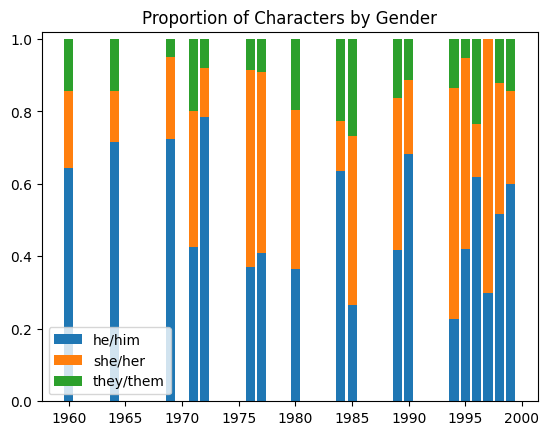

In [23]:
ax = plt.gca()
plt.bar(he_by_year.index, he_by_year['proportion'])
plt.bar(she_by_year.index, she_by_year['proportion'], bottom=he_by_year['proportion'])
plt.bar(they_by_year.index, they_by_year['proportion'], bottom=he_by_year['proportion']+she_by_year['proportion'])
plt.title("Proportion of Characters by Gender")
ax.legend(["he/him", "she/her", "they/them"])
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 10
# fig_size[1] = 6
# plt.rcParams["figure.figsize"] = fig_size
plt.ylim(0,1.02)
plt.show()

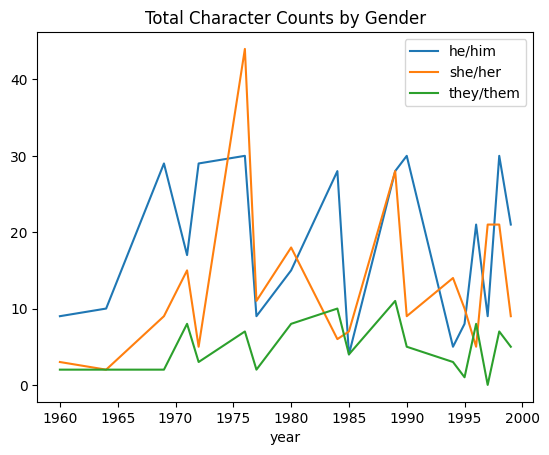

In [24]:
ax = plt.gca()
he_by_year.plot(kind='line', y='g.argmax', ax=ax) 
she_by_year.plot(y='g.argmax', ax=ax)
they_by_year.plot(y='g.argmax', ax=ax)
ax.legend(["he/him", "she/her", "they/them"])
plt.title("Total Character Counts by Gender")
plt.show()

In [25]:
pickle_df[pickle_df['year'] == '1976'].dropna().groupby(['title'])[['title']].agg({'title':'unique'})


,title
title,


Text(0.5, 1.0, 'Total Book Counts by Year')

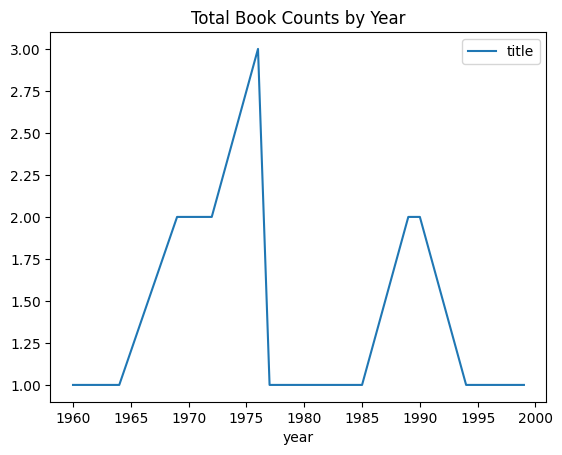

In [26]:
books_by_year = pickle_df.dropna().groupby(['year','title'])[['title']].agg({'title':'unique'})
total_books_by_year = books_by_year.groupby(['year']).count()
total_books_by_year.plot()
plt.title("Total Book Counts by Year")